<a href="https://colab.research.google.com/github/akshay2077/AND-Intern-Project-Solutions/blob/main/Minor_Project_Model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings( action = 'ignore')

In [ ]:
data = pd.read_csv("/content/used_car_price.csv")
data.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019


In [ ]:
def remove_comma_and_km(value):
  """Removes comma and 'km' from a string."""
  return value.replace(',', '').replace('km', '')

# Assuming your DataFrame is named 'data'
data['kms_driven'] = data['kms_driven'].apply(remove_comma_and_km)

In [ ]:
def convert_to_int(value):
  try:
    return int(value)
  except ValueError:
    return None

data['kms_driven'] = data['kms_driven'].apply(convert_to_int)

In [ ]:
data.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,22402,Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,10344,Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,12999,Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,45000,Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,11193,Petrol,Kolkata,2019


In [ ]:
data1 = data.copy()
data1['car_name'] = data['car_name'].apply(lambda x : x.split(' ')[0])

In [ ]:
def convert(x):
    if ',' in x:
        s =  x.split(' ')[1].split(',')
        return float(s[0] + s[1])
    else:
        value = float(x.split(' ')[1])
        return value * 100000

data2 = data1.copy()
data2['car_price_in_rupees'] = data['car_price_in_rupees'].apply(convert)

In [ ]:
data2.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai,445000.0,22402,Petrol,Mumbai,2016
1,Maruti,293000.0,10344,Petrol,Kolkata,2019
2,Tata,2249000.0,12999,Diesel,Bangalore,2021
3,Maruti,695000.0,45000,Petrol,Thane,2016
4,Jeep,1200000.0,11193,Petrol,Kolkata,2019


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             2105 non-null   object 
 1   car_price_in_rupees  2105 non-null   float64
 2   kms_driven           2105 non-null   int64  
 3   fuel_type            2105 non-null   object 
 4   city                 2105 non-null   object 
 5   year_of_manufacture  2105 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 98.8+ KB


In [ ]:
data2.shape

(2105, 6)

In [ ]:
data['fuel_type'].value_counts()

fuel_type
Petrol        1348
Diesel         636
CNG             82
Petrol + 1      18
Electric        10
Diesel + 1       7
Hybrid           2
LPG              2
Name: count, dtype: int64

In [ ]:
# Checking Missing Values
data2.isnull().sum()

car_name               0
car_price_in_rupees    0
kms_driven             0
fuel_type              0
city                   0
year_of_manufacture    0
dtype: int64

In [ ]:
# Feature Engineering
data2["car_age"] = 2024 - data2["year_of_manufacture"] #Assuming current year is 2024
data2["mileage_per_year"] = data2["kms_driven"] / data2["car_age"]

In [ ]:
#Encoding Categorical Column
data2.replace({'fuel_type':{'Petrol':0,'Diesel':1,'CNG':2,'Petrol + 1':3,'Electric':4,'Diesel + 1':5,'Hybrid':6,'LPG':7}}, inplace = True)

In [ ]:
data2.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,car_age,mileage_per_year
0,Hyundai,445000.0,22402,0,Mumbai,2016,8,2800.25
1,Maruti,293000.0,10344,0,Kolkata,2019,5,2068.80
2,Tata,2249000.0,12999,1,Bangalore,2021,3,4333.00
3,Maruti,695000.0,45000,0,Thane,2016,8,5625.00
4,Jeep,1200000.0,11193,0,Kolkata,2019,5,2238.60


In [ ]:
dummies = pd.get_dummies(data2.car_name)
data2 = pd.concat([data2, dummies],axis=1)

In [ ]:
data2.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,car_age,mileage_per_year,Audi,BMW,...,Maruti,Mercedes-Benz,Nissan,Porsche,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,Hyundai,445000.0,22402,0,Mumbai,2016,8,2800.25,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Maruti,293000.0,10344,0,Kolkata,2019,5,2068.80,False,False,...,True,False,False,False,False,False,False,False,False,False
2,Tata,2249000.0,12999,1,Bangalore,2021,3,4333.00,False,False,...,False,False,False,False,False,False,True,False,False,False
3,Maruti,695000.0,45000,0,Thane,2016,8,5625.00,False,False,...,True,False,False,False,False,False,False,False,False,False
4,Jeep,1200000.0,11193,0,Kolkata,2019,5,2238.60,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#separating dependent and independent varibales
X = data2.drop(columns = ['car_price_in_rupees','car_name','city','year_of_manufacture'],axis = 1)
Y = data2['car_price_in_rupees']

In [ ]:
X

,kms_driven,fuel_type,car_age,mileage_per_year,Audi,BMW,Bentley,Chevrolet,Citroen,Datsun,...,Maruti,Mercedes-Benz,Nissan,Porsche,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,22402,0,8,2800.250000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10344,0,5,2068.800000,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,12999,1,3,4333.000000,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,45000,0,8,5625.000000,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,11193,0,5,2238.600000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,42158,1,9,4684.222222,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2101,68862,1,11,6260.181818,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2102,37622,0,6,6270.333333,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2103,64726,0,7,9246.571429,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [ ]:
Y

0        445000.0
1        293000.0
2       2249000.0
3        695000.0
4       1200000.0
          ...    
2100     360000.0
2101    2200000.0
2102     838000.0
2103     675000.0
2104     876000.0
Name: car_price_in_rupees, Length: 2105, dtype: float64

In [ ]:
# Splitting the data into train and test
x_train, x_test, y_train, y_test = tts(X, Y, test_size = 0.3,random_state = 101)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1473, 32), (632, 32), (1473,), (632,))

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Evaluation metrics
training_data_predictions = lr.predict(x_train)

In [ ]:
from sklearn import metrics
error_score = metrics.r2_score(y_train,training_data_predictions)

In [ ]:
# R squared error
error_score

0.6531921978611182

Text(0.5, 1.0, 'Visualize the training model')

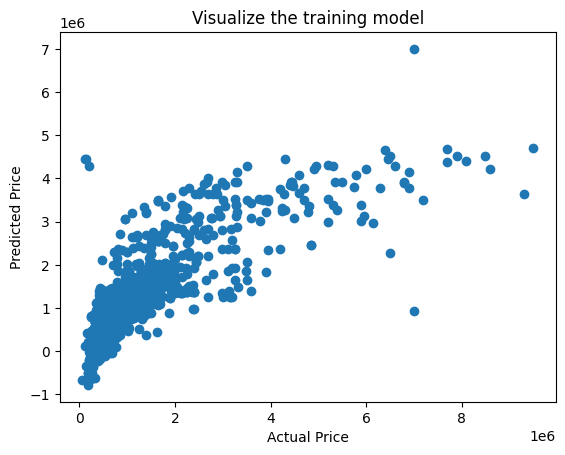

In [ ]:
# Visualization
plt.scatter(y_train,training_data_predictions)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Visualize the training model')

In [ ]:
testing_data_predictions = lr.predict(x_test)
from sklearn import metrics
error_score2 = metrics.r2_score(y_test,testing_data_predictions)

In [ ]:
error_score2

0.5595446714914527

Text(0.5, 1.0, 'Visualize the testing model')

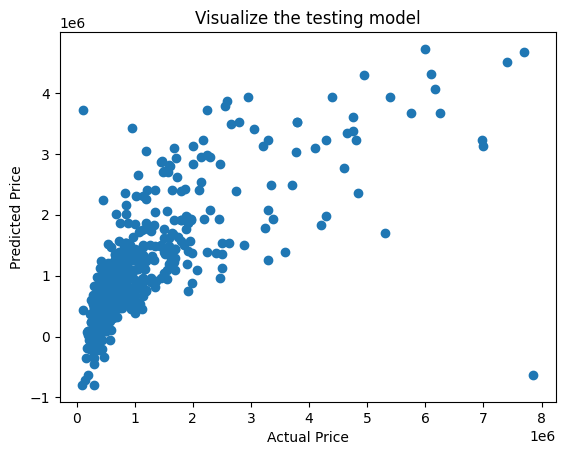

In [ ]:
# Visualization
plt.scatter(y_test,testing_data_predictions)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Visualize the testing model')